In [1]:
# WIP

In [1]:
# V 1.14
# Standard Imports
import pandas as pd
import numpy as np
from zipfile import ZipFile
import json

# Plotting 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl
from bokeh.plotting import figure, output_notebook, show, output_file
import seaborn as sns

output_notebook()
%matplotlib inline

from bokeh.layouts import layout, widgetbox
from bokeh.models import ColumnDataSource, HoverTool, BoxZoomTool, ResetTool, PanTool
from bokeh.models.widgets import Slider, Select, TextInput, Div
from bokeh.models import WheelZoomTool, SaveTool, LassoSelectTool
from bokeh.io import curdoc
from functools import lru_cache
import bokeh

# Pandas Setup
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

# Colour Management
MC = '#242a49'  # Main
SC = '#ededed'  # Secondary
TC = 'red'  # Tertiary 

colors = ['#202540', '#17b5ff', 'red', 'pink', '#443857', '#bed6f7', '#144c4a']
cmap = mcolors.LinearSegmentedColormap.from_list('n', ['red', 'white', MC])
cmap2 = mcolors.LinearSegmentedColormap.from_list('n', ['white', MC])
boxplot_params = dict(
    patch_artist=True,
    boxprops=dict(facecolor=SC, color=MC),
    capprops=dict(color=MC, linewidth=2),
    whiskerprops=dict(color=MC),
    flierprops=dict(color=MC, markeredgecolor=MC),
    medianprops=dict(color='red', linewidth=2),
)

#Pyplot Setup
plt.rcParams.update({
    'font.family': 'monospace',
    'font.size': 10,
    'figure.figsize': (12, 6),
    'axes.titlesize': 16.0,
    'axes.facecolor': 'none',
    'axes.formatter.useoffset': False,  # Scientific notation
    'grid.color': SC,
    'figure.frameon': False,
})

Loading BokehJS ...

In [3]:
# Additional imports
from wordcloud import WordCloud, STOPWORDS
import nltk.tokenize as word_tokenize
import nltk
from textblob import TextBlob
import textblob

In [4]:
# Used Versions
print('Pandas:', pd.__version__)
print('Numpy:', np.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)
print('Bokeh', bokeh.__version__)
print('TextBlob', textblob.__version__)

Pandas: 0.23.4
Numpy: 1.14.3
Matplotlib 2.2.3
Seaborn 0.9.0
Bokeh 0.12.10
TextBlob 0.15.1


In [5]:
df = pd.read_csv(
    ZipFile('data/fifa-2018-match-statistics.zip').open('FIFA 2018 Statistics.csv'), parse_dates=['Date'])

df.head(3)

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,2018-06-14,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.00,Group Stage,No,0,nan,nan
1,2018-06-14,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,nan,Group Stage,No,0,nan,nan
2,2018-06-15,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,nan,Group Stage,No,0,nan,nan


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
Date                      128 non-null datetime64[ns]
Team                      128 non-null object
Opponent                  128 non-null object
Goal Scored               128 non-null int64
Ball Possession %         128 non-null int64
Attempts                  128 non-null int64
On-Target                 128 non-null int64
Off-Target                128 non-null int64
Blocked                   128 non-null int64
Corners                   128 non-null int64
Offsides                  128 non-null int64
Free Kicks                128 non-null int64
Saves                     128 non-null int64
Pass Accuracy %           128 non-null int64
Passes                    128 non-null int64
Distance Covered (Kms)    128 non-null int64
Fouls Committed           128 non-null int64
Yellow Card               128 non-null int64
Yellow & Red              128 non-null int64
Red                       128

In [7]:
df.shape

(128, 27)

In [8]:
old_cols = df.columns

In [9]:
old_cols

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')

In [10]:
# Changing columns to 'camel case'
new_cols = []
for col in old_cols:
    col = col.replace('_', ' ')
    col = col.replace('.', ' ')
    col = col.replace('%', '')
    col = col.replace('&', '')
    col = col.replace('-', '')
    col = col.replace('(Kms)', '')
    col = col.title()
    col = col.replace(' ', '')
    new_cols.append(col)
new_cols

['Date',
 'Team',
 'Opponent',
 'GoalScored',
 'BallPossession',
 'Attempts',
 'Ontarget',
 'Offtarget',
 'Blocked',
 'Corners',
 'Offsides',
 'FreeKicks',
 'Saves',
 'PassAccuracy',
 'Passes',
 'DistanceCovered',
 'FoulsCommitted',
 'YellowCard',
 'YellowRed',
 'Red',
 'ManOfTheMatch',
 '1StGoal',
 'Round',
 'Pso',
 'GoalsInPso',
 'OwnGoals',
 'OwnGoalTime']

In [11]:
df.columns = new_cols

In [43]:
df.head()

,Date,Team,Opponent,GoalScored,BallPossession,Attempts,Ontarget,Offtarget,Blocked,Corners,Offsides,FreeKicks,Saves,PassAccuracy,Passes,DistanceCovered,FoulsCommitted,YellowCard,YellowRed,Red,ManOfTheMatch,1StGoal,Round,Pso,GoalsInPso,OwnGoals,OwnGoalTime
0,2018-06-14,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.00,Group Stage,No,0,nan,nan
1,2018-06-14,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,nan,Group Stage,No,0,nan,nan
2,2018-06-15,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,nan,Group Stage,No,0,nan,nan
3,2018-06-15,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.00,Group Stage,No,0,nan,nan
4,2018-06-15,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,nan,Group Stage,No,0,1.00,90.00


In [58]:
# result 

In [94]:
# Ugly but works
results_lst = []
for index, row in df.iterrows():
    team = row['Team']
    opponent = row['Opponent']
    team_goals = row['GoalScored']
    opponent_goals = df[(df.Team == opponent) & (df.Opponent == team)].GoalScored
    score = team_goals - opponent_goals
    try:
        score = int(score)
    except:
        score = np.nan
    if score > 0:
        result = 'WIN'
    elif score < 0:
        result = 'LOST'
    elif score == 0:
        result = 'DRAW'
    else:
        resutl = np.nan
#     print(result)
    results_lst.append(result)
        
df['Result'] = results_lst

# Sanity check
df.Result.value_counts()

LOST    51
WIN     51
DRAW    26
Name: Result, dtype: int64

In [95]:
df.head(4)

,Date,Team,Opponent,GoalScored,BallPossession,Attempts,Ontarget,Offtarget,Blocked,Corners,Offsides,FreeKicks,Saves,PassAccuracy,Passes,DistanceCovered,FoulsCommitted,YellowCard,YellowRed,Red,ManOfTheMatch,1StGoal,Round,Pso,GoalsInPso,OwnGoals,OwnGoalTime,Result
0,2018-06-14,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.00,Group Stage,No,0,nan,nan,WIN
1,2018-06-14,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,nan,Group Stage,No,0,nan,nan,LOST
2,2018-06-15,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,nan,Group Stage,No,0,nan,nan,LOST
3,2018-06-15,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.00,Group Stage,No,0,nan,nan,WIN


In [13]:
df.GoalScored.sum()

169

/Users/kamilwroniewicz/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/kamilwroniewicz/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


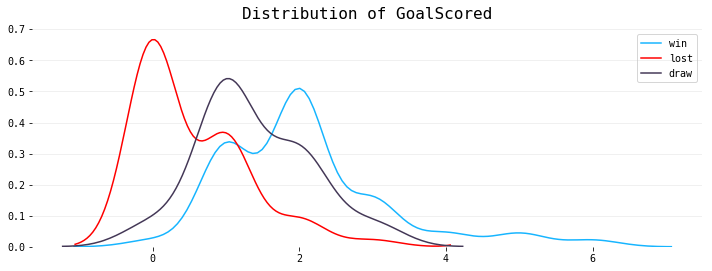

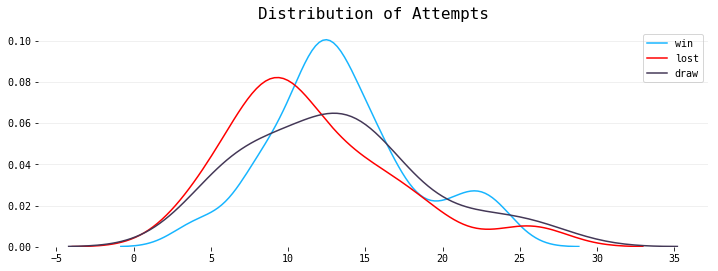

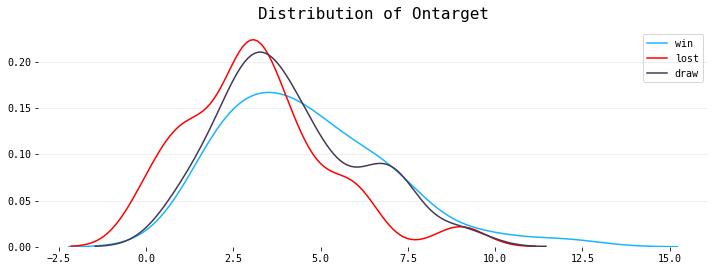

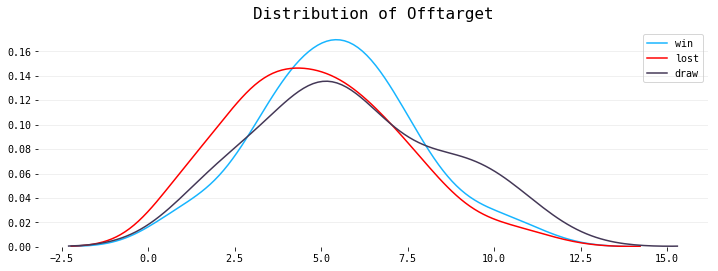

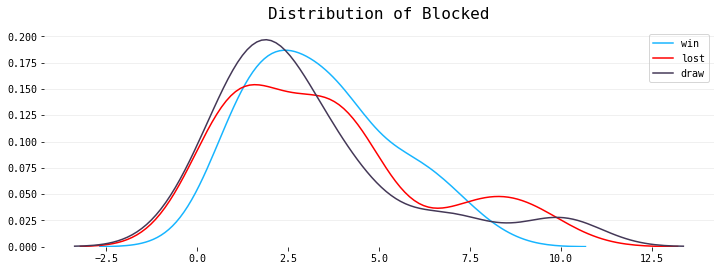

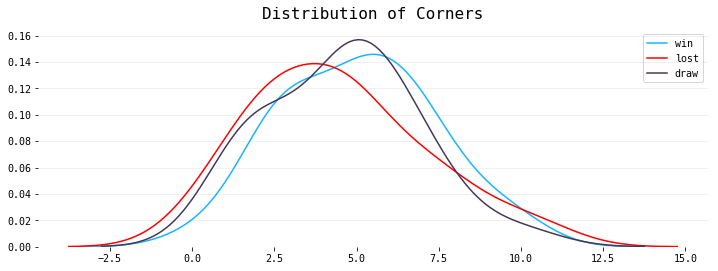

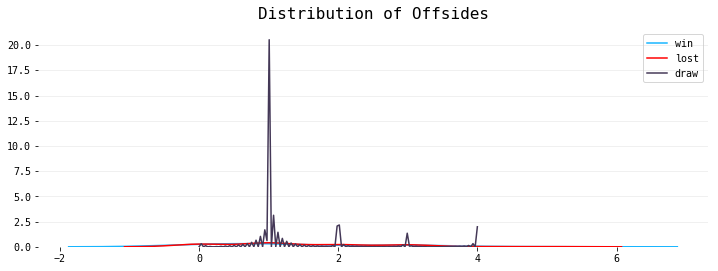

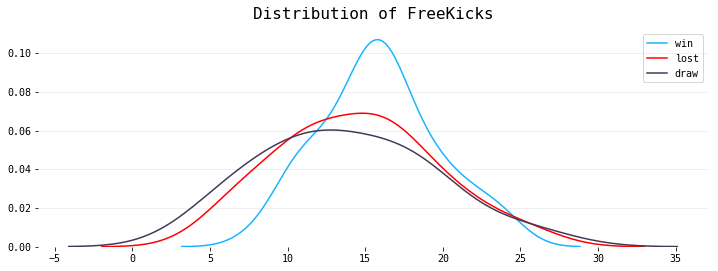

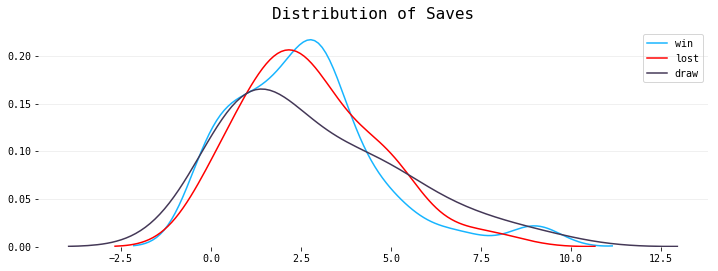

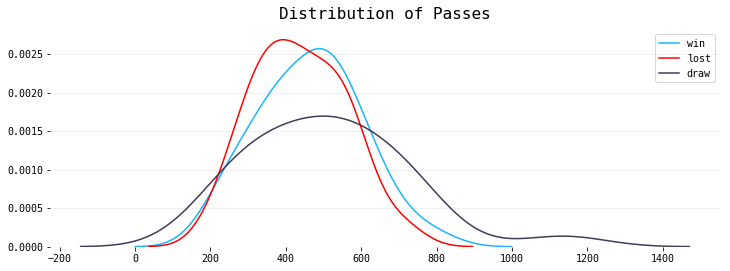

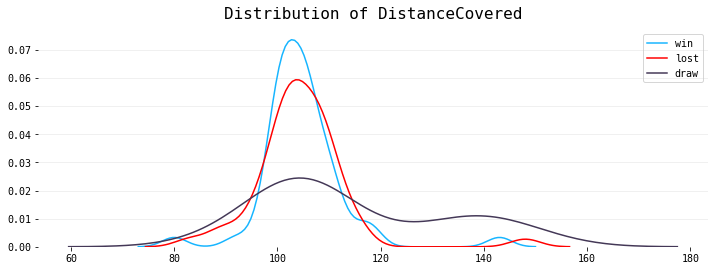

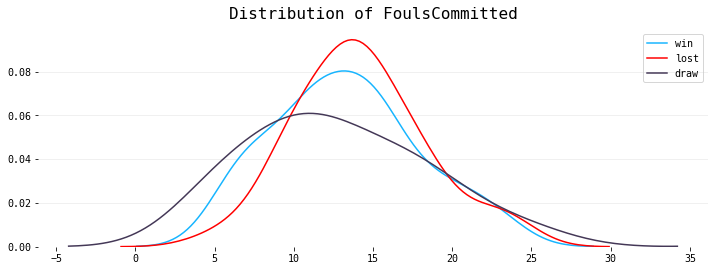

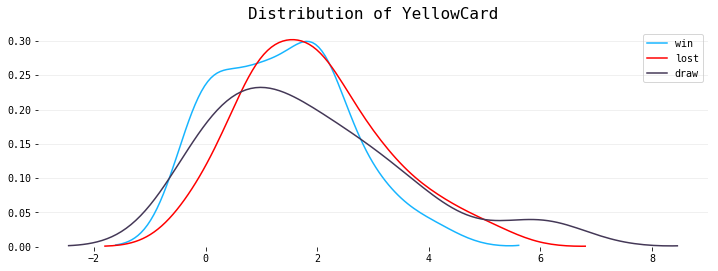

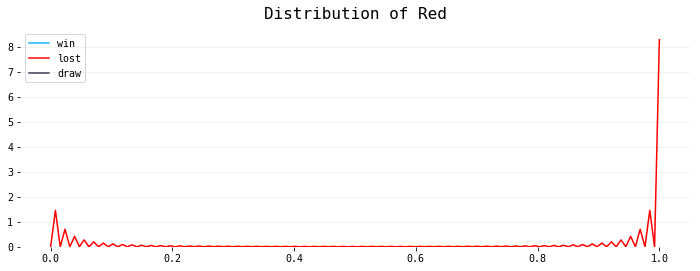

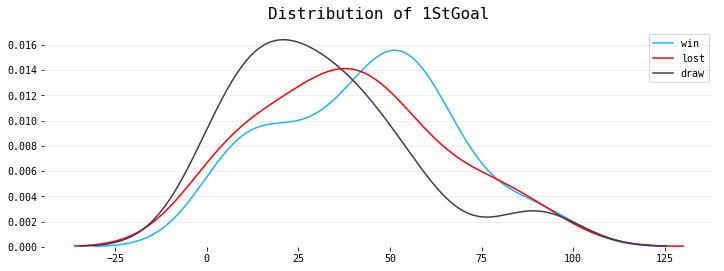

In [108]:
dist_cols = ['GoalScored', 'Attempts', 'Ontarget', 'Offtarget', 'Blocked',\
             'Corners', 'Offsides', 'FreeKicks', 'Saves', 'Passes', 
             'DistanceCovered', 'FoulsCommitted', 'YellowCard', 'Red', '1StGoal']

for col in dist_cols:
    plt.figure(figsize=(12, 4))
    plt.axes(frameon=False)
    sns.kdeplot(df[col][df.Result == 'WIN'].dropna(), color=colors[1], label='win')
    sns.kdeplot(df[col][df.Result == 'LOST'].dropna(), color=colors[2], label='lost')
    sns.kdeplot(df[col][df.Result == 'DRAW'].dropna(), color=colors[4], label='draw')
    plt.grid(axis='y')
    
    
    plt.title('Distribution of {}'.format(col), y=1.02);